# Problem1

In [1]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "TAIEX",
    "start_date": "2012-12-01",
    "end_date": "2018-12-02"
}
r = requests.get(url, params=parameter)
data = r.json()
stock_deal_info = data["data"]
df_taiex=pd.DataFrame(stock_deal_info)
#print(df_taiex)
df_taiex=df_taiex.drop(columns=['date','stock_id','Trading_money', 'spread','Trading_turnover'],axis=1)
#df_taiex.to_csv("TAIEX2.csv")
#print(df_taiex)
df_taiex

,Trading_Volume,open,max,min,close
0,3696524900,7582.65,7628.29,7562.19,7599.91
1,3947860691,7572.11,7600.98,7536.66,7600.98
2,4858910844,7575.63,7650.12,7567.46,7649.05
3,4399887242,7660.97,7673.62,7616.79,7623.26
4,3888752378,7640.25,7672.92,7631.63,7642.26
...,...,...,...,...,...
1470,3938988241,9679.98,9847.35,9679.98,9765.36
1471,4333008909,9728.95,9781.40,9688.74,9778.62
1472,5413428690,9774.03,9890.89,9767.14,9884.31
1473,5863859324,9959.87,10001.85,9885.36,9885.36


# Problem2

In [2]:
import numpy as np
label=[]
def triple_barrier(price, ub, lb):
    for i in range(price.shape[0]):
        today_price=price.iloc[i]
        for day in range(1,21):
            if(i+day)<price.shape[0]:
                compare_price=price.iloc[i+day]
                if today_price*ub<=compare_price:
                    label.append(1)
                    break
                elif today_price*lb>=compare_price:
                    label.append(2)
                    break
            if day==20:
                label.append(0)
                break
            if (i+day)==price.shape[0]:
                label.append(float("NaN"))
                break
triple_barrier(df_taiex.close, 1.04, 0.98)
triple_barrier_signal = pd.DataFrame({'triple_barrier_signal':label})
df_taiex=pd.concat([df_taiex,triple_barrier_signal["triple_barrier_signal"]],axis=1)
df_taiex
#df_taiex.to_csv("TAIEX2.csv")
#label
#print(label)                    
        

,Trading_Volume,open,max,min,close,triple_barrier_signal
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0
...,...,...,...,...,...,...
1470,3938988241,9679.98,9847.35,9679.98,9765.36,NaN
1471,4333008909,9728.95,9781.40,9688.74,9778.62,NaN
1472,5413428690,9774.03,9890.89,9767.14,9884.31,NaN
1473,5863859324,9959.87,10001.85,9885.36,9885.36,NaN


# Problem3

In [ ]:
! conda install -c conda-forge ta-lib

In [3]:
import talib
#5 days
MA_5_days = talib.MA(df_taiex.close, timeperiod = 5, matype = 0)
MA_bios_5_days=(df_taiex.close-MA_5_days)/MA_5_days
MA_bios_5_days = pd.DataFrame({'MA_bios_5_days':MA_bios_5_days})
df_taiex=pd.concat([df_taiex,MA_bios_5_days],axis=1)

#10 days
MA_10_days = talib.MA(df_taiex.close, timeperiod = 10, matype = 0)
MA_bios_10_days=(df_taiex.close-MA_10_days)/MA_10_days
MA_bios_10_days = pd.DataFrame({'MA_bios_10_days':MA_bios_10_days})
df_taiex=pd.concat([df_taiex,MA_bios_10_days],axis=1)

#20 days
MA_20_days = talib.MA(df_taiex.close, timeperiod = 20, matype = 0)
MA_bios_20_days=(df_taiex.close-MA_20_days)/MA_20_days
MA_bios_20_days = pd.DataFrame({'MA_bios_20_days':MA_bios_20_days})
df_taiex=pd.concat([df_taiex,MA_bios_20_days],axis=1)

#60 days
MA_60_days = talib.MA(df_taiex.close, timeperiod = 60, matype = 0)
MA_bios_60_days=(df_taiex.close-MA_60_days)/MA_60_days
MA_bios_60_days = pd.DataFrame({'MA_bios_60_days':MA_bios_60_days})
df_taiex=pd.concat([df_taiex,MA_bios_60_days],axis=1)

df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1470,3938988241,9679.98,9847.35,9679.98,9765.36,NaN,0.003987,0.000008,-0.003342,-0.049497
1471,4333008909,9728.95,9781.40,9688.74,9778.62,NaN,0.004635,0.001337,-0.003273,-0.046218
1472,5413428690,9774.03,9890.89,9767.14,9884.31,NaN,0.012523,0.011203,0.007078,-0.034213
1473,5863859324,9959.87,10001.85,9885.36,9885.36,NaN,0.009103,0.010701,0.006977,-0.032321


In [4]:
RSI14=talib.RSI(df_taiex.close,14)
RSI14 = pd.DataFrame({'RSI14':RSI14})
df_taiex=pd.concat([df_taiex,RSI14],axis=1)
df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days,RSI14
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1470,3938988241,9679.98,9847.35,9679.98,9765.36,NaN,0.003987,0.000008,-0.003342,-0.049497,43.356907
1471,4333008909,9728.95,9781.40,9688.74,9778.62,NaN,0.004635,0.001337,-0.003273,-0.046218,44.269531
1472,5413428690,9774.03,9890.89,9767.14,9884.31,NaN,0.012523,0.011203,0.007078,-0.034213,51.040585
1473,5863859324,9959.87,10001.85,9885.36,9885.36,NaN,0.009103,0.010701,0.006977,-0.032321,51.104144


In [5]:
df_taiex["MACD"],df_taiex["MACDsignal"],df_taiex["MACDhist"]=talib.MACD(df_taiex.close)
df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days,RSI14,MACD,MACDsignal,MACDhist
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,3938988241,9679.98,9847.35,9679.98,9765.36,NaN,0.003987,0.000008,-0.003342,-0.049497,43.356907,-95.071726,-113.048977,17.977251
1471,4333008909,9728.95,9781.40,9688.74,9778.62,NaN,0.004635,0.001337,-0.003273,-0.046218,44.269531,-87.264028,-107.891987,20.627959
1472,5413428690,9774.03,9890.89,9767.14,9884.31,NaN,0.012523,0.011203,0.007078,-0.034213,51.040585,-71.721313,-100.657852,28.936540
1473,5863859324,9959.87,10001.85,9885.36,9885.36,NaN,0.009103,0.010701,0.006977,-0.032321,51.104144,-58.642874,-92.254857,33.611982


## Drop all NAN 

In [6]:
df_taiex = df_taiex.dropna()
#df_taiex
df_taiex.to_csv("TAIEX.csv")

# Problem4

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_taiex.drop(columns=["triple_barrier_signal"]))
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[1.00000000e+00 1.96666053e-12]
[1. 1.]


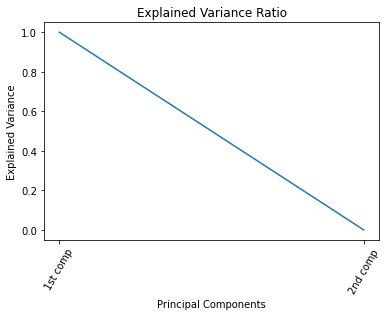

In [8]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,2),
           ["1st comp", "2nd comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

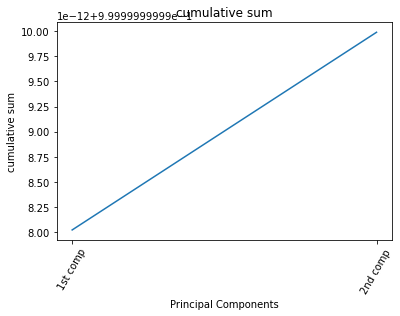

In [9]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.ylabel('cumulative sum')
plt.xlabel('Principal Components')

plt.xticks(range(0,2),
           ["1st comp", "2nd comp"], rotation=60)
plt.title('cumulative sum')
plt.show()

In [10]:
X_pca=pca.transform(df_taiex.drop(columns=["triple_barrier_signal"]))
print(X_pca.shape)

(1399, 2)


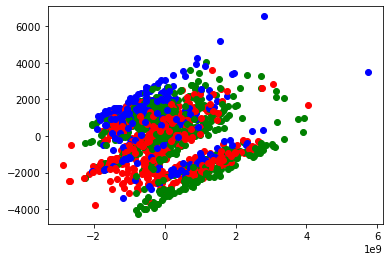

In [12]:
import matplotlib.pyplot as plt
cdict = {0: 'red', 1: 'blue', 2: 'green'}
#print(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    #print(i)
    plt.scatter(X_pca[i, 0], X_pca[i,1], c=cdict[df_taiex["triple_barrier_signal"].iloc[i]])
plt.show()